In [1]:
from figures import *

In [2]:
# Default parameters.
N = 100
dt = 1e-2
k0 = 1/10
tau = 40

beta, gamm = [1, 1/2]

# Population sizes from other example.
Nz = 10;  Nx = 50;  Ny = 500

# Create default parameter set.
params = createparams( N, [beta, gamm], tau, k0=1/10 )
print( params )

{'N': 100, 'bk': 1.0, 'beta': 1, 'gamm': 0.5, 'rho1': 0, 'rho2': 0.1, 'tau': 40, 'alpha': 1.5, 'k0': 0.1}


In [3]:
# Varied population list.
n = 100;  nmin = 1;  nmax = 7
Nlist = 10**np.linspace( nmin,nmax,n )

# Compute critical delay list.
resultslist = Parallel( n_jobs=-1 )(
    delayed( computebifurcation )( [N, N**(1/2)], createparams( N, [beta,gamm], -1, k0=k0 ), kmin=-5, kmax=10 )
        for N in Nlist )

In [4]:
# Unpack results.
tauclist = [results[1].x[0] for results in resultslist]
errlist = [results[1].fun for results in resultslist]
paramsclist = [createparams( N, [beta, gamm], tauc, k0=k0 ) for N, tauc in zip( Nlist, tauclist )]

# Compute characteristic coefficients.
clist = np.array( [charactercoeff( paramsc ) for paramsc in paramsclist] )
c1list = clist[:,0];  c2list = clist[:,1]
wlist = np.sqrt( 2*c2list - c1list**2 )

# Compute power bounds for coefficient axis.
wmin = round( np.floor( np.log10( np.min( wlist ) ) ) )
wmax = round( np.ceil(  np.log10( np.max( wlist ) ) ) )

# Compute power bounds for delay axes.
taumin = round( np.floor( np.log10( np.min( tauclist ) ) ) )
taumax = round( np.ceil(  np.log10( np.max( tauclist ) ) ) )

Minimum tau threshold: 1149.7569953977356 with delay 28.021795490071298


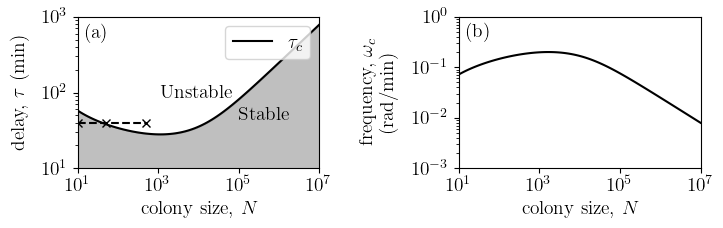

In [ ]:
# Print minimum tau threshold.
print( 'Minimum tau threshold:', Nlist[np.argmin( tauclist )], 'with delay', np.min( tauclist ) )

# Plot evolution of time-series and poincare map intersections.
fig, axs = plt.subplots( 1,2,sharex=True )

# Plot the scaling of the critical delay length.
axs[0].plot( Nlist, tauclist, color='k', label='$\\tau_c$' )
axs[0].fill_between( Nlist, 10**taumin*np.ones( Nlist.shape ), tauclist, color='grey', alpha=1/2 )

axs[0].plot( [Nz, Nx, Ny], [tau, tau, tau], color='k', marker='x', linestyle='--' )

axs[0].set_xlim( [Nlist[0], Nlist[-1]] )
axs[0].set_ylim( [10**taumin, 10**taumax] )

axs[0].set_ylabel( 'delay, $\\tau$ (min)' )
axs[0].set_xlabel( 'colony size, $N$' )
axs[0].legend( loc=1 )

axs[0].text( 10**5, 65, 'Stable', va='top', ha='left' )
axs[0].text( 3/4*10**5, 75, 'Unstable', va='bottom', ha='right' )
axs[0].text( 1.5*Nlist[0], 0.8*10**taumax, '(a)', va='top', ha='left' )

axs[0].set_xscale( 'log' )
axs[0].set_yscale( 'log' )

axs[0].plot( 0,0,color='k',label='$\\tau_c$' )     # For creating the legend.
axs[0].plot( 0,0,color='k',linestyle='--',label='$\\omega_c$' )

# Plot the characteristic frequency.
axs[1].plot( Nlist, wlist, color='k', label='$\\omega_c$' )

axs[1].set_ylim( [10**wmin, 10**wmax] )

axs[1].text( 1.5*Nlist[0], 0.75*10**wmax, '(b)', va='top', ha='left' )

axs[1].set_ylabel( 'frequency, $\\omega_c$\n(rad/min)' )
axs[1].set_xlabel( 'colony size, $N$' )

axs[1].set_yscale( 'log' )

axs[0].yaxis.set_label_coords( -0.20, 0.5 )
axs[1].yaxis.set_label_coords( -0.25, 0.5 )

fig.set_figwidth( 7.5 )
fig.set_figheight( 2.5 )
fig.tight_layout()

if 0:
    savefigure( fig, 'results/critical_delay_trend' )